In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

In [14]:
def load_dic_bb_elements(path_bb_elements):
    l_bb_elements = []
    step = 0
    while True:
        path = path_bb_elements + f"bb_elements_step_{step}.pkl"
        if not os.path.exists(path):
            break
        else:
            with open(path, "rb") as f:
                bb_elements = pickle.load(f)
            l_bb_elements.append(bb_elements)
            step += 1
    return l_bb_elements



In [15]:
# Load simulation with 21 steps
l_bb_elements_21_true = load_dic_bb_elements(
    "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/scans/dynamic_collapse/base_collider/xtrack_0000/"
)

# Load simulation with 6 steps (21 steps due to interpolation)
l_bb_elements_6_true = load_dic_bb_elements(
    "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/scans/dynamic_collapse/base_collider/xtrack_0000_alt_precompute_multiset/"
)

# Load simulation with 6 steps and bb reset between each step
l_bb_elements_6_reset = load_dic_bb_elements(
    "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/scans/dynamic_collapse/base_collider/xtrack_0000_precompute_resetonbbscale/"
)

# Load simulation with 6 steps and static ip 1
l_bb_elements_6_static = load_dic_bb_elements(
    "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/scans/dynamic_collapse/base_collider/xtrack_0000_precompute_static_ip1_5steps/"
)

# Load simulation with 21 steps and static ip 1

l_bb_elements_21_static = load_dic_bb_elements(
    "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/scans/dynamic_collapse/base_collider/xtrack_0000_precompute_static_ip1_20steps/"
)

In [16]:
# Define list of attributes used

l_attr_lr = [
    "scale_strength",
    "ref_shift_x",
    "ref_shift_y",
    "other_beam_shift_x",
    "other_beam_shift_y",
    "post_subtract_px",
    "post_subtract_py",
    "other_beam_q0",
    "other_beam_beta0",
    "other_beam_num_particles",
    "other_beam_Sigma_11",
    "other_beam_Sigma_13",
    "other_beam_Sigma_33",
    "min_sigma_diff",
]

l_attr_ho = [
    "scale_strength",
    "_sin_phi",
    "_cos_phi",
    "_tan_phi",
    "_sin_alpha",
    "_cos_alpha",
    "ref_shift_x",
    "ref_shift_px",
    "ref_shift_y",
    "ref_shift_py",
    "ref_shift_zeta",
    "ref_shift_pzeta",
    "other_beam_shift_x",
    "other_beam_shift_px",
    "other_beam_shift_y",
    "other_beam_shift_py",
    "other_beam_shift_zeta",
    "other_beam_shift_pzeta",
    "post_subtract_x",
    "post_subtract_px",
    "post_subtract_y",
    "post_subtract_py",
    "post_subtract_zeta",
    "post_subtract_pzeta",
    "other_beam_q0",
    "num_slices_other_beam",
    "slices_other_beam_num_particles",
    "slices_other_beam_x_center_star",
    "slices_other_beam_px_center_star",
    "slices_other_beam_y_center_star",
    "slices_other_beam_py_center_star",
    "slices_other_beam_zeta_center_star",
    "slices_other_beam_pzeta_center_star",
    "slices_other_beam_Sigma_11_star",
    "slices_other_beam_Sigma_12_star",
    "slices_other_beam_Sigma_13_star",
    "slices_other_beam_Sigma_14_star",
    "slices_other_beam_Sigma_22_star",
    "slices_other_beam_Sigma_23_star",
    "slices_other_beam_Sigma_24_star",
    "slices_other_beam_Sigma_33_star",
    "slices_other_beam_Sigma_34_star",
    "slices_other_beam_Sigma_44_star",
    "min_sigma_diff",
    "threshold_singular",
    "flag_beamstrahlung",
    "slices_other_beam_zeta_bin_width_star_beamstrahlung",
    "slices_other_beam_sqrtSigma_11_beamstrahlung",
    "slices_other_beam_sqrtSigma_33_beamstrahlung",
    "slices_other_beam_sqrtSigma_55_beamstrahlung",
]

In [17]:
# Function that returns the value of elements that are changing as the bump is closing
def return_val_elements(l_bb_elements, filter_array_b1=None, multiset = False):
    lll_val = [[], []]
    l_element_names = ["bb_lr.l5b1_01", "bb_lr.l5b2_01"]
    l_beams = ["lhcb1", "lhcb2"]
    for d_bb_elements in l_bb_elements:
        for ll_val, beam, element_name in zip(lll_val, l_beams, l_element_names):
            l_val = []
            for x in l_attr_lr:
                if multiset:
                    val = d_bb_elements[beam]["bb_lr"][element_name][x]  
                else:
                    val = getattr(d_bb_elements[beam][element_name], x)
                if type(val) in [float, int, np.float64, np.int64]:
                    l_val.append(val)
                elif type(val) == np.ndarray or type(val) == list:
                    l_val.append(val[0])
                else:
                    print(type(val))
                    raise ValueError("Unknown type")
            ll_val.append(l_val)

    ll_val_b1, ll_val_b2 = lll_val

    # Convert all lists to numpy arrays
    ll_val_b1 = np.array(ll_val_b1).T
    ll_val_b2 = np.array(ll_val_b2).T
    l_elements_of_interest = np.array(l_attr_lr)

    if filter_array_b1 is None:
        # Only keep elements whose value is changing (should be the same for both beams)
        filter_array_b1 = ll_val_b1.std(axis=1) >= 1e-8

    l_elements_of_interest = l_elements_of_interest[filter_array_b1]
    l_position_of_interest = filter_array_b1 
    ll_val_b1 = ll_val_b1[filter_array_b1 ]
    ll_val_b2 = ll_val_b2[filter_array_b1 ]
        

    return ll_val_b1, ll_val_b2, l_elements_of_interest, l_position_of_interest, filter_array_b1



In [18]:
(
    ll_val_b1_21_true,
    ll_val_b2_21_true,
    l_elements_of_interest_21_true,
    l_position_of_interest_21_true,
    filter_array_b1_true,
) = return_val_elements(l_bb_elements_21_true)

(
    ll_val_b1_6_true,
    ll_val_b2_6_true,
    l_elements_of_interest_6_true,
    l_position_of_interest_6_true,
    _,
) = return_val_elements(l_bb_elements_6_true, filter_array_b1=filter_array_b1_true, multiset=True)
(
    ll_val_b1_6_reset,
    ll_val_b2_6_reset,
    l_elements_of_interest_6_reset,
    l_position_of_interest_6_reset,
    _,
) = return_val_elements(l_bb_elements_6_reset, filter_array_b1=filter_array_b1_true)
(
    ll_val_b1_6_static,
    ll_val_b2_6_static,
    l_elements_of_interest_6_static,
    l_position_of_interest_6_static,
    _,
) = return_val_elements(l_bb_elements_6_static, filter_array_b1=filter_array_b1_true)

(
    ll_val_b1_21_static,
    ll_val_b2_21_static,
    l_elements_of_interest_21_static,
    l_position_of_interest_21_static,
    _,
) = return_val_elements(l_bb_elements_21_static, filter_array_b1=filter_array_b1_true)

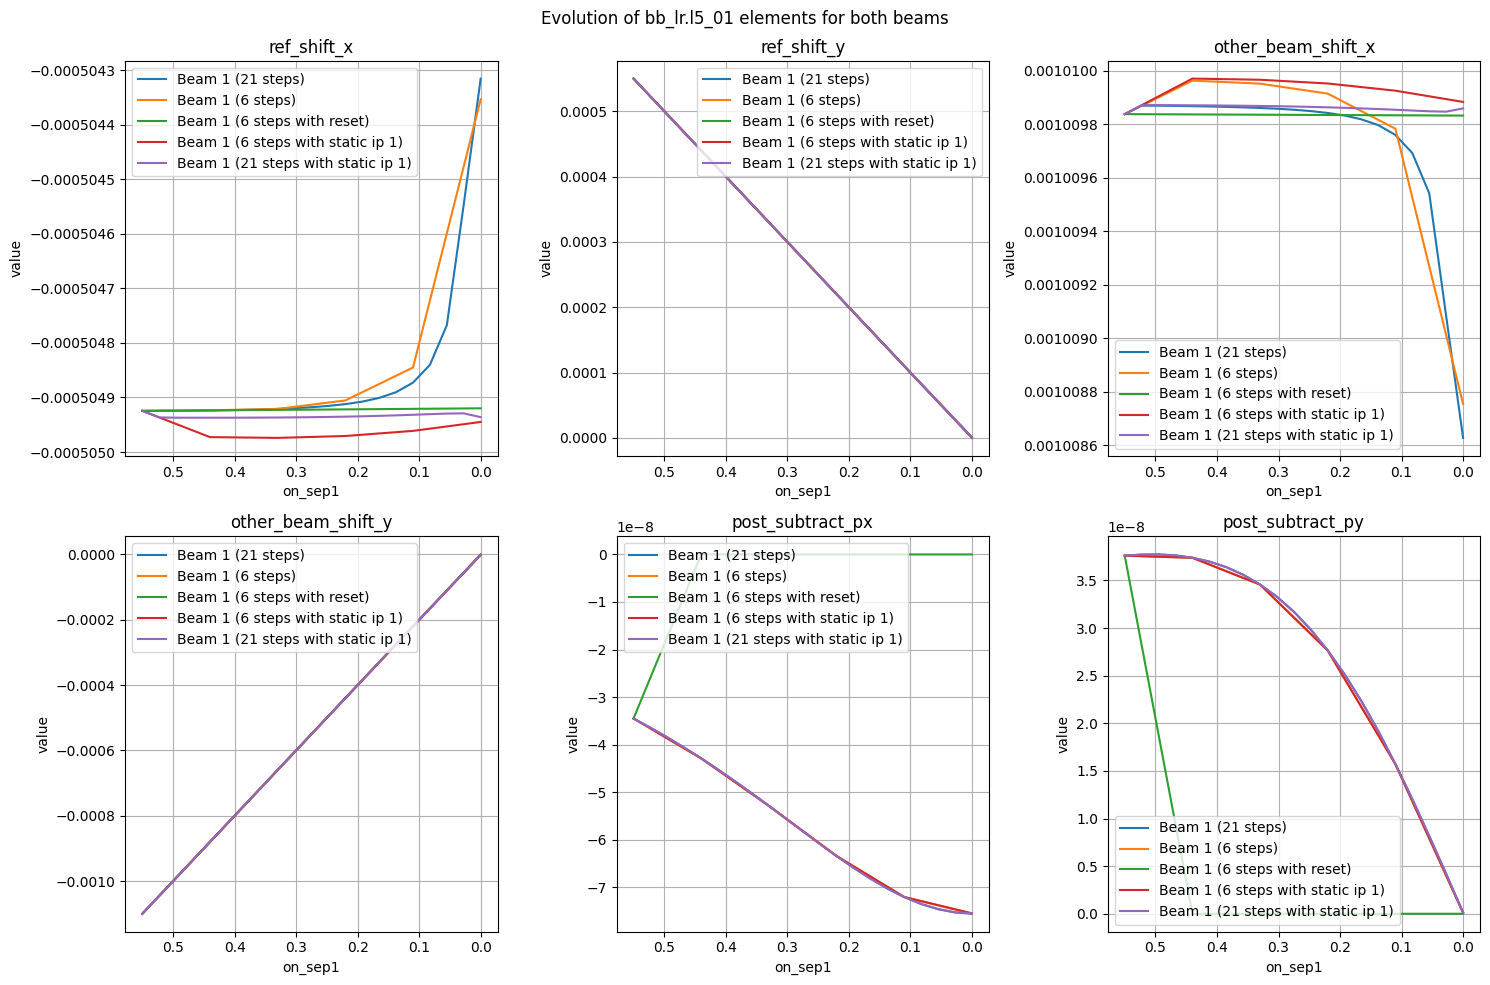

In [20]:

# Define two x-axis depending if 6 or 21 steps
on_sep1_21 = np.linspace(0.55,0,21, endpoint=True)
on_sep1_6 = np.linspace(0.55,0,6, endpoint=True)

# Make a plot for each element (6 elements in total, 3*3 subplots)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, element in enumerate(l_elements_of_interest_21_true):
    # 21 steps 
    axs[i//3, i%3].plot(on_sep1_21, ll_val_b1_21_true[i], label='Beam 1 (21 steps)')
    #axs[i//3, i%3].plot(on_sep1_21, ll_val_b2_21_true[i], label='Beam 2 (21 steps)')
    
    # 6 steps
    axs[i//3, i%3].plot(on_sep1_21[1:], ll_val_b1_6_true[i][1:], label='Beam 1 (6 steps)')
    #axs[i//3, i%3].plot(on_sep1_21, ll_val_b2_6_true[i], label='Beam 2 (21 steps)')

    # 6 steps with reset
    axs[i//3, i%3].plot(on_sep1_6, ll_val_b1_6_reset[i], label='Beam 1 (6 steps with reset)')
    #axs[i//3, i%3].plot(on_sep1_6, ll_val_b2_6_reset[i], label='Beam 2 (6 steps with reset)')

    # 6 steps with static ip 1
    axs[i//3, i%3].plot(on_sep1_6, ll_val_b1_6_static[i], label='Beam 1 (6 steps with static ip 1)')
    #axs[i//3, i%3].plot(on_sep1_6, ll_val_b2_6_static[i], label='Beam 2 (6 steps with static ip 1)')

    # 21 steps with static ip 1
    axs[i//3, i%3].plot(on_sep1_21, ll_val_b1_21_static[i], label='Beam 1 (21 steps with static ip 1)')
    #axs[i//3, i%3].plot(on_sep1_21, ll_val_b2_21_static[i], label='Beam 2 (21 steps with static ip 1)')

    axs[i//3, i%3].grid()
    axs[i//3, i%3].set_xlabel("on_sep1")
    axs[i//3, i%3].invert_xaxis()
    axs[i//3, i%3].set_ylabel("value")
    axs[i//3, i%3].set_title(element)
    axs[i//3, i%3].legend()

plt.suptitle("Evolution of bb_lr.l5_01 elements for both beams")
plt.tight_layout()
plt.show()


In [21]:
# Analyse corresponding twiss files
def load_df_twiss(path_twiss):
    l_df_twiss = []
    step = 0
    while True:
        path = path_twiss + f"b1_step_twiss_{step}.pkl"
        if not os.path.exists(path):
            break
        else:
            with open(path, "rb") as f:
                bb_elements = pickle.load(f)
            l_df_twiss.append(bb_elements)
            step += 1
    return l_df_twiss

In [25]:
# Load simulation with 6 steps and bb reset between each step
l_twiss_6_reset = load_df_twiss(
    "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/scans/dynamic_collapse/base_collider/xtrack_0000_precompute_resetonbbscale/"
)

# Load simulation with 6 steps and static ip 1
l_twiss_static_6 = load_df_twiss(
    "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/scans/dynamic_collapse/base_collider/xtrack_0000_precompute_static_ip1_5steps/"
)

# Load simulation with 21 steps and static ip 1

# l_twiss_static_21 = load_df_twiss(
#     "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/scans/dynamic_collapse/base_collider/xtrack_0000_precompute_static_ip1_20steps/"
# )

In [32]:
l_twiss_6_reset[0][['name','s', 'x', 'px', 'y', 'py']][(l_twiss_6_reset[0]['name']=='ip1')|(l_twiss_6_reset[0]['name']=='ip5')]

,name,s,x,px,y,py
19009,ip5,6664.568433,-4.705650e-09,1.350045e-04,5.499933e-04,-1.410814e-08
59212,ip1,19994.162400,-5.499919e-04,3.804141e-09,-2.495449e-11,1.350068e-04


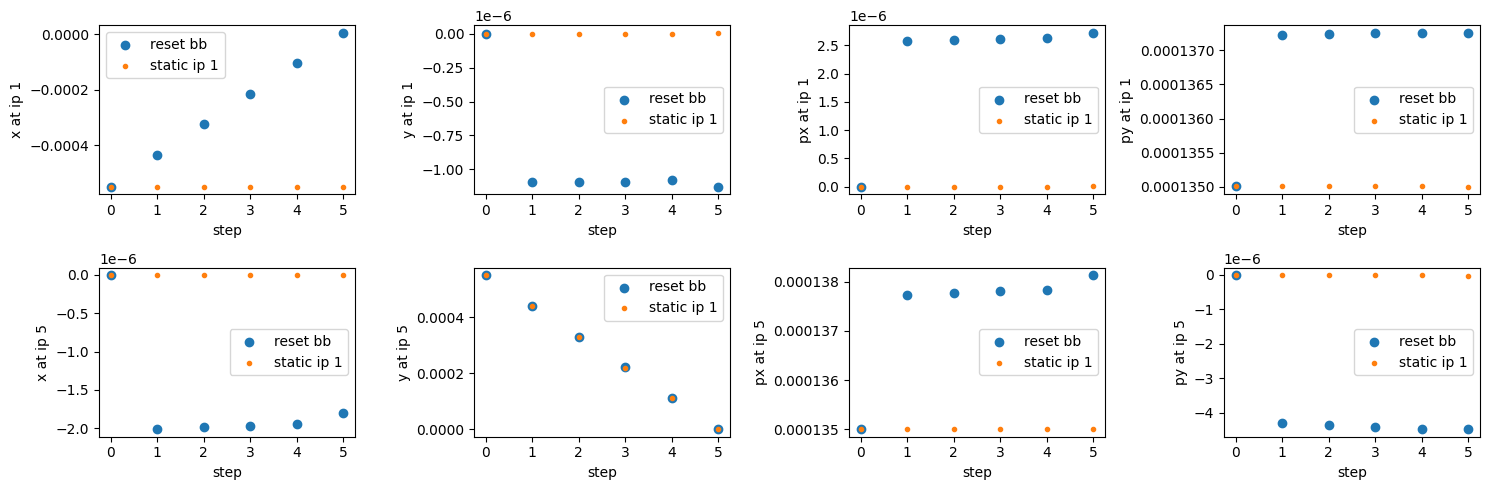

In [46]:
# Define x-axis depending for 6 steps
xrange = np.linspace(1,6,6, endpoint=True)

# Plot the evolution of x, y, px and py for beam 1 in all cases
fig, axs = plt.subplots(2, 4, figsize=(15, 5))
for idx, (tw_reset_6, tw_static_6) in enumerate(zip(l_twiss_6_reset, l_twiss_static_6)):
    tw_reset_6 =  l_twiss_6_reset[idx]
    tw_static_6 = l_twiss_static_6[idx]

    # Plot x at ip 1
    axs[0,0].scatter(idx, tw_reset_6[['x']][tw_reset_6['name'] == 'ip1'], color = 'C0', marker = 'o', label='reset bb')
    axs[0,0].scatter(idx, tw_static_6[['x']][tw_static_6['name'] == 'ip1'], color = 'C1',marker = '.',label='static ip 1')
    if idx == 0:
        axs[0,0].set_xlabel("step")
        axs[0,0].set_ylabel("x at ip 1")
        axs[0,0].legend()

    # Plot x at ip 5
    axs[1,0].scatter(idx, tw_reset_6[['x']][tw_reset_6['name'] == 'ip5'], color = 'C0',marker = 'o',label='reset bb')
    axs[1,0].scatter(idx, tw_static_6[['x']][tw_static_6['name'] == 'ip5'], color = 'C1',marker = '.',label='static ip 1')
    if idx == 0:
        axs[1,0].set_xlabel("step")
        axs[1,0].set_ylabel("x at ip 5")
        axs[1,0].legend()

    # Plot y at ip 1
    axs[0,1].scatter(idx, tw_reset_6[['y']][tw_reset_6['name'] == 'ip1'], color = 'C0',marker = 'o',label='reset bb')
    axs[0,1].scatter(idx, tw_static_6[['y']][tw_static_6['name'] == 'ip1'], color = 'C1',marker = '.',label='static ip 1')
    if idx == 0:
        axs[0,1].set_xlabel("step")
        axs[0,1].set_ylabel("y at ip 1")
        axs[0,1].legend()

    # Plot y at ip 5
    axs[1,1].scatter(idx, tw_reset_6[['y']][tw_reset_6['name'] == 'ip5'], color = 'C0',marker = 'o',label='reset bb')
    axs[1,1].scatter(idx, tw_static_6[['y']][tw_static_6['name'] == 'ip5'], color = 'C1',marker = '.',label='static ip 1')
    if idx == 0:
        axs[1,1].set_xlabel("step")
        axs[1,1].set_ylabel("y at ip 5")
        axs[1,1].legend()

    # Plot px at ip 1
    axs[0,2].scatter(idx, tw_reset_6[['px']][tw_reset_6['name'] == 'ip1'], color = 'C0',marker = 'o',label='reset bb')
    axs[0,2].scatter(idx, tw_static_6[['px']][tw_static_6['name'] == 'ip1'], color = 'C1',marker = '.',label='static ip 1')
    if idx == 0:
        axs[0,2].set_xlabel("step")
        axs[0,2].set_ylabel("px at ip 1")
        axs[0,2].legend()
    
    # Plot px at ip 5
    axs[1,2].scatter(idx, tw_reset_6[['px']][tw_reset_6['name'] == 'ip5'], color = 'C0',marker = 'o',label='reset bb')
    axs[1,2].scatter(idx, tw_static_6[['px']][tw_static_6['name'] == 'ip5'], color = 'C1',marker = '.',label='static ip 1')
    if idx == 0:
        axs[1,2].set_xlabel("step")
        axs[1,2].set_ylabel("px at ip 5")
        axs[1,2].legend()
    
    # Plot py at ip 1
    axs[0,3].scatter(idx, tw_reset_6[['py']][tw_reset_6['name'] == 'ip1'], color = 'C0',marker = 'o',label='reset bb')
    axs[0,3].scatter(idx, tw_static_6[['py']][tw_static_6['name'] == 'ip1'], color = 'C1',marker = '.',label='static ip 1')
    if idx == 0:
        axs[0,3].set_xlabel("step")
        axs[0,3].set_ylabel("py at ip 1")
        axs[0,3].legend()

    # Plot py at ip 5
    axs[1,3].scatter(idx, tw_reset_6[['py']][tw_reset_6['name'] == 'ip5'], color = 'C0',marker = 'o',label='reset bb')
    axs[1,3].scatter(idx, tw_static_6[['py']][tw_static_6['name'] == 'ip5'], color = 'C1',marker = '.',label='static ip 1')
    if idx == 0:
        axs[1,3].set_xlabel("step")
        axs[1,3].set_ylabel("py at ip 5")
        axs[1,3].legend()

plt.tight_layout()
plt.show()

